## Importing of modules and loading of dataset

In [3]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


missing_values =["N/a", "na", np.nan, "", 0, "NaN"]
energy_data = pd.read_csv("energy-use-per-capita-vs-gdp-per-capita.csv",na_values = missing_values)
meat_data =pd.read_csv("meat-consumption-vs-gdp-per-capita.csv", na_values = missing_values)
health_data =pd.read_csv("healthcare-expenditure-vs-gdp.csv",na_values = missing_values)

### Cleaning of the Dataset
##### Extracting the data between 1990 -2020 and droping the redundant columns 

In [4]:
energy_data = energy_data.drop(['GDP ','Population', 'Continent'],axis =1)
energy_data = energy_data[energy_data.Year >=1990]
meat_data = meat_data.drop(['Entity', 'GDP ','Population', 'Continent'],axis =1)
meat_data = meat_data[meat_data.Year >=1990]
health_data = health_data.drop(['Entity','Population', 'Continent'],axis =1)
health_data =health_data[health_data.Year >=1990]


### Merging of the Dataset

In [5]:
data = pd.merge(pd.merge(energy_data , meat_data, on=['Code', 'Year']), health_data , on=['Code' , 'Year'])

### Training set for the model
##### For training purpose we select USA and India, then check correlation between GDP and different categories

In [6]:
data =data.loc[data['Code'].isin(["IND"])]             # add countries of your choice. 


##### Automatic filling of NA values with ffill and bfill values between two points grouped by country for rest of the data 
###### data = data.interpolate()  

In [7]:
data["Meat_quantity"] = data.groupby('Entity')['Meat_quantity'].transform(lambda x: x.ffill().bfill())
data["Energy_use "] = data.groupby('Entity')['Energy_use '].transform(lambda x: x.ffill().bfill())
data["health_expenditure"] = data.groupby('Entity')['health_expenditure'].transform(lambda x: x.ffill().bfill())
data["GDP "] = data.groupby('Entity')['GDP '].transform(lambda x: x.ffill().bfill())

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 6,
                       ):
                            print(data)

       Entity Code    Year  Energy_use   Meat_quantity  health_expenditure  \
797508  India  IND  1990.0  4071.380910           4.12           86.040833   
797509  India  IND  1991.0  4156.175422           4.23           86.040833   
797510  India  IND  1992.0  4222.601078           4.23           86.040833   
797511  India  IND  1993.0  4239.303587           4.23           86.040833   
797512  India  IND  1994.0  4317.357469           4.18           86.040833   
797513  India  IND  1995.0  4478.618307           4.10           86.040833   
797514  India  IND  1996.0  4529.030354           4.08           86.040833   
797515  India  IND  1997.0  4621.508162           4.02           86.040833   
797516  India  IND  1998.0  4646.171513           4.06           86.040833   
797517  India  IND  1999.0  4826.013804           4.05           86.040833   
797518  India  IND  2000.0  4853.054761           3.97           86.040833   
797519  India  IND  2001.0  4838.247877           4.03          

#### Checking the null values

In [8]:
print("Null Values: ")
print(data.isnull().sum())


Null Values: 
Entity                0
Code                  0
Year                  0
Energy_use            0
Meat_quantity         0
health_expenditure    0
GDP                   0
dtype: int64


##### Correlation

In [9]:
print("Correlation co-effecient :")
x = data.loc[:,"Energy_use "]         #0.62 -> moderately correlated
y = data.loc[:,"Meat_quantity"]         #0.275 -> Weakly  correlated
z = data.loc[:,"health_expenditure"]    #0.97 ->strongly correlated
g = data.loc[:,"GDP "]        
print("Health Expenditure:",(np.corrcoef(z,g))[0][1])
print("Meat Production:",(np.corrcoef(y,g))[0][1])
print("Energy Consumption:",(np.corrcoef(x,g))[0][1])

Correlation co-effecient :
Health Expenditure: 0.9807653784168027
Meat Production: 0.47290957539841133
Energy Consumption: 0.980985254708644


Energy consumption vs GDP


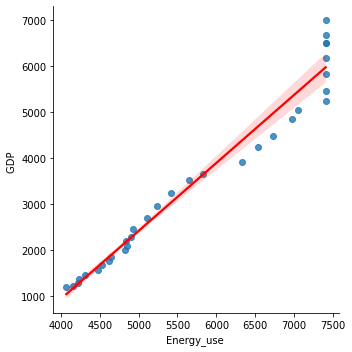

In [14]:

sns.lmplot(x='Energy_use ',y='GDP ',data=data,fit_reg=True,line_kws={"color": "red"})
#hry

Meat consumption and GDP


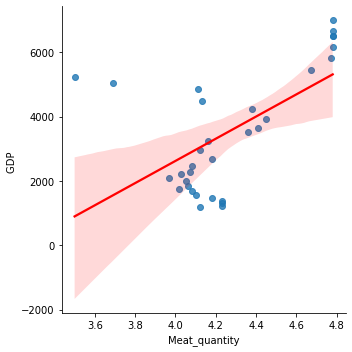

In [43]:
sns.lmplot(x='Meat_quantity',y='GDP ',data=data,fit_reg=True,line_kws={"color": "red"})

Healt Expenditure and GDP

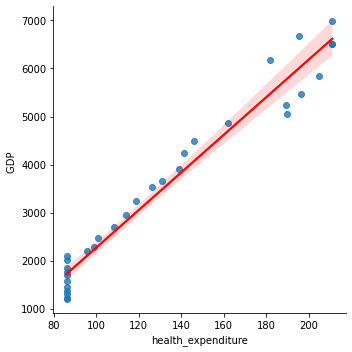

In [45]:
sns.lmplot(x='health_expenditure',y='GDP ',data=data,fit_reg=True,line_kws={"color": "red"})

In [11]:
profile = ProfileReport(data, title ="Summary of Dataset", explorative =True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]